In [1]:
#@title
!git clone https://github.com/facebookresearch/BenchMARL
#@title
%cd /content/BenchMARL
#@title
!pip install -U torch torchvision
!pip install -e .
#@title
!pip install dm-meltingpot
!apt-get update
!apt-get install -y x11-utils
!apt-get install -y xvfb
!apt-get install -y imagemagick
!pip install pyvirtualdisplay
!pip install id-marl-eval
!apt-get install python3-opengl
!pip install --upgrade chex
!pip install wandb
!pip install vmas[all]
!python -m pip install vmas
!python -c "import vmas; print(vmas.__version__)"
import pyvirtualdisplay
display = pyvirtualdisplay.Display(visible=False, size=(1400, 900))
display.start()

fatal: destination path 'BenchMARL' already exists and is not an empty directory.
/content/BenchMARL
Obtaining file:///content/BenchMARL
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for benchmarl (pyproject.toml) ... done
  Created wheel for benchmarl: filename=benchmarl-1.3.0-0.editable-py3-none-any.whl size=3799 sha256=ede85ccb6b6df84b6d2d3c368e275fd6669663ed43ef5a836f9341f029d25a7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-9gspe49w/wheels/5b/86/4d/eff20c27275b75bdf6b20e4a81af849509b0068ff4c44be9df
Successfully built benchmarl
  Attempting uninstall: benchmarl
    Found existing installation: benchmarl 1.3.0
    Uninstalling benchmarl-1.3.0:
      Successfully uninstalled benchmarl-1.3.0
  Using cached chex-0.1.7-py3-none-any.whl.metadata (17 kB)
Using cached chex-0.1.7-py3-none-any.whl (89 kB)
 

In [2]:
import wandb
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

  settings = self._wl.settings.copy()



Created benchmark with 6 experiments.


mean return = 0.9629788398742676: 100%|██████████| 200/200 [1:17:34<00:00, 22.57s/it]

collection/agents/info/agent_collisions,▇▇▆▅▆▇▆▆▆▇▅▆▆▇▄▆▂▄▄▁▅▇▇█▇███████████████
collection/agents/info/final_rew,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
collection/agents/info/pos_rew,▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▄▄▄▄▅▅▅▅▅▆▅▆▆▆▆▆▇▇▇███
collection/agents/reward/episode_reward_max,▂▁▁▁▁▁▁▁▂▁▂▂▂▂▂▃▄▅▅▅▆▆▆▆▆▇▆█▆▆▇▇▇█▆▇▇▇▇█
collection/agents/reward/episode_reward_mean,▄▃▄▄▃▄▃▃▃▄▄▃▄▄▃▃▁▂▁▃▄▂▃▅▆▇▇██▇██████████
collection/agents/reward/episode_reward_min,▅▆▆▅▅▆▄▂▆▆▄▅▆▁▃▆▃▆▄▆▆▇▇█▇▇██████████████
collection/reward/episode_reward_max,▁▂▁▁▁▁▁▁▂▂▁▂▁▂▂▂▂▄▄▄▆▅▆▆▆▆▆▇▇▇▇▇▇▇▇██▇▇▇
collection/reward/episode_reward_mean,▃▃▄▃▄▃▃▃▃▄▄▃▄▃▃▃▂▂▃▁▂▃▃▃▆████▇██████████
collection/reward/episode_reward_min,▆▇▆▃▅▆▆▇▆▆▆▆▄▅▃▂▁▃▆▇▇▇▇▇█▇██▇███████████
collection/reward/reward_max,▁▁▃▁▁▂▃▁▂▁▁▂▂▂▃▂▃▃▃▃▃▄▅▄▅▆▆▇▇▇▇█▇▇▇█▇█▇▇
collection/reward/reward_mean,▃▃▁▂▁▂▃▂▂▂▃▁▁▁▁▁▃▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████


  lambda data: self._console_raw_callback("stderr", data),

mean return = 0.9629788398742676: 100%|██████████| 200/200 [1:17:37<00:00, 23.29s/it]
  settings = self._wl.settings.copy()



mean return = -351.64239501953125: 100%|██████████| 200/200 [1:09:58<00:00, 20.81s/it]

collection/agents/reward/episode_reward_max,▂▁▆▆▃▂▁▄▅▅▄▄▅▅▄▆▇▆▆▅▅▅█▇▆▇▇▇▇█▇▇▇▇▆▇▅▇▇▇
collection/agents/reward/episode_reward_mean,▂▁▃▃▂▁▂▄▅▅▆▅▆▆▆▇▆▆▆▇▇▇▇███▇█▇▇█▇█▇██████
collection/agents/reward/episode_reward_min,▄▁▄▁▃▅▃▆▆▅▆▆▆▆▅▆▆▆▆▆▆▇▇▆▇▆▇▇▇▇▇█▇▇██▇▇▇▇
collection/reward/episode_reward_max,▆▄▂▅▁▃▆▅▄▃▂▄▄▄▄▄▅▄▇▇▆▆▆▅▅▇▆█▇▇▇▇▇█▆▇█▆▇▇
collection/reward/episode_reward_mean,▂▃▁▁▂▂▃▃▃▃▄▄▅▄▄▅▆▆▆▆▅▆▇▇▇▇▇▇█▇▇▇▇▇▇▇████
collection/reward/episode_reward_min,▆▅▆▄▅▅▅▄▁▃▇▇▆▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇▇█▇████████▇
collection/reward/reward_max,▂▁▄▁▄▃▄▅▆▆▇▆▆▇▇▇▅▇▆▇▆▅▇▆▆▇▆▆▆▇▆█▅▇▇▇▆▇▇▇
collection/reward/reward_mean,▂▂▂▂▃▃▃▂▂▁▅▄▅▅▅▅▆▆▆▆▆▆▆▅▆▇▇▇▇▇▇▇▇▇▇███▇█
collection/reward/reward_min,▄▃▄▄▆▁▄▆▄▄▆▆▆▅▆▄▇▇▆▇█▇▆▆▇▆▇▅▇▅▆▆▇▄▆▇▅▆█▅
counters/current_frames,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
counters/iter,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇██


  lambda data: self._console_raw_callback("stderr", data),

mean return = -351.64239501953125: 100%|██████████| 200/200 [1:10:00<00:00, 21.00s/it]
  settings = self._wl.settings.copy()



mean return = -8.350285530090332: 100%|██████████| 200/200 [1:39:04<00:00, 28.23s/it]

collection/adversary/reward/episode_reward_max,▅▄▆▁▃▅▆▃▆▆▄▅▅▄▆▄▄▆▃▇▅▁▅▆▆▆█▅▇▆▇█▇▄▇▇▇▇▇▇
collection/adversary/reward/episode_reward_mean,▁▁▁▁▂▂▃▂▃▃▄▄▄▄▅▅▄▅▅▆▆▇▆▆▆▆▆▆▇▅▇▇▇█▇██▇▇▇
collection/adversary/reward/episode_reward_min,▄▁▄▃▅▂▅▆▅▅▆▇▅▆▅▄▁▆▇▆▇▆▆▇▆▅██▇▁▅▂▅█▂▇▆▆▇▇
collection/agent/reward/episode_reward_max,▅▄▆▆▅█▆▅▇▄▃▃▃▂▃▃▃▄▆▆▇▄▆▃▃▂▃▂▂█▃▂▃▆█▄▁▃▅▂
collection/agent/reward/episode_reward_mean,▃▂▃▁▅▅▄▅▂▄▄▆▄▄▅▅▅▆▆▇▇▆▇▆▆█▆▇▇▆▅▆▅▆▄▄▅▅▄▅
collection/agent/reward/episode_reward_min,▁▂▅▃▄▄▂▃▃▄▅▅▇▇▇█▇▇▇█▇████▇▇▇▇▇██▇█▇▇▇▇▇▇
collection/reward/episode_reward_max,▄▂▁▃▆▃▆▄▆▆▇▅▆▆▆▇▇██▇█▆▇▇▇▇▇▇███▇██▇██▇▇▇
collection/reward/episode_reward_mean,▂▂▁▁▁▂▃▃▃▄▅▅▅▅▆▇▇▇▇█▇▇███████████▇██████
collection/reward/episode_reward_min,▃▃▂▁▃▃▂▃▄▂▃▄▄▃▅▄▆▇█▇▇▇▇▇█▇█████▇████████
collection/reward/reward_max,▅▅▄▄▄▃▅▂▆▄▄▃▃▃▂▂▁▇▃▃▆▄▃▄▆▃▃▃▄▄▅█▁▄▄▅▄▃▂▂
collection/reward/reward_mean,▄▂▃▃▇▁▂▂▄▁▄▂▄▃▄▂▆▅▅▆▆█▆▇▇▇▇▇▄▇█▅▄▆▅▆▃▄▄▄


  lambda data: self._console_raw_callback("stderr", data),

mean return = -8.350285530090332: 100%|██████████| 200/200 [1:39:06<00:00, 29.73s/it]
  settings = self._wl.settings.copy()



mean return = 0.4891006350517273: 100%|██████████| 200/200 [58:31<00:00, 20.76s/it] 

collection/agents/info/agent_collisions,█▇▆▇▇▇▇▇▇▇▇▇▇▇▇▆▇▆▆▅▁▁▁▂▃▂▂▃▂▃▅▅▅▅▄▅▆▆▄▄
collection/agents/info/final_rew,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
collection/agents/info/pos_rew,▂▁▂▁▁▂▂▂▂▂▂▂▂▂▂▃▃▃▃▅▅▅▄▄█▆▆▄▇█▅█▇▇▇▇▇▇▆█
collection/agents/reward/episode_reward_max,▁▂▁▁▂▂▂▁▂▁▁▂▁▂▂▂▃▃▃▄▄▅▅▄▆▅▅▄▆▆▆▇▇▆█▅▆█▇▆
collection/agents/reward/episode_reward_mean,▆▇▆▆▆▆▆▅▆▆▆▆▆▆▆▆▆▆▆▄▆▅▂▄▄▁▃▅▅▄▆▅▅▆▆▅▇▇█▇
collection/agents/reward/episode_reward_min,█▇▇▆▅▇▇▇▆▆▇▇▇▆▇▅▆▅▄▅▁▆▂▁▂▄▄▂▅▃▄▅▇▅▇▃▇▃▆▇
collection/reward/episode_reward_max,▁▁▁▂▁▂▁▁▁▁▂▂▁▂▂▂▂▂▂▂▃▃▄▄▃▄▅▆▅▆█▆▇▇▇▇▆▆█▇
collection/reward/episode_reward_mean,▆▆▆▆▆▆▆▆▆▆▆▆▅▄▅▅▅▄▅▅▁▄▄▆▇▃▆▆▅▆▅▇▆▆▇▇▇▆▇█
collection/reward/episode_reward_min,█▇█▇▆▇▇▇▇▇▇▇█▇▇▅▆▇▇▇▆▁▅▅▅▆▆▆▆▇▇▅▇▆▆█▇▆▇█
collection/reward/reward_max,▁▁▂▃▂▂▂▂▂▂▂▂▁▂▃▂▁▂▂▂▄▃▃▆▇▇█▇▇█▇▇█▇██▇███
collection/reward/reward_mean,▅▅▆▅▅▅▅▅▅▅▅▅▅▅▆▅▅▆▅▅▅▃▂▃▃▂▄▁▁▆▃▄▅▅▆▆▄▆▅█


  lambda data: self._console_raw_callback("stderr", data),

mean return = 0.4891006350517273: 100%|██████████| 200/200 [58:34<00:00, 17.57s/it]
  settings = self._wl.settings.copy()



mean return = -340.5264892578125: 100%|██████████| 200/200 [1:02:23<00:00, 19.08s/it]

collection/agents/reward/episode_reward_max,▁▂▄▃▃▂▅▃▃▅▃▄▃▅▃▇▄▃▆▆▆█▅▅▇▆▆▆▆▆▇▆▇▆▇▇█▇█▇
collection/agents/reward/episode_reward_mean,▁▁▂▂▁▃▄▃▄▄▅▆▅▅▅▆▆▆▆▆▆▇▆▇▆▇▇█▇▇▇▇██▇█▇███
collection/agents/reward/episode_reward_min,▂▁▄▅▅▆▆▆▆▇▇▇▆▇▇▇▆▆▇▆▇▇▇▇▇▇▇▇█▆█▇▇▇██▇█▇▇
collection/reward/episode_reward_max,▂▄▄▁▂▂▄▆█▃▄▃▃▄▄▄▆▄▅▅▆▅█▆▆▆▆█▅▆▇▆▇▆▅▆██▆▇
collection/reward/episode_reward_mean,▂▃▁▁▁▃▃▃▄▅▅▅▅▅▅▅▅▆▅▆▆▆▇▇▇▇▇▇▇▇▇▇█▇██▇███
collection/reward/episode_reward_min,▂▄▅▃▅▄▆▁▆▆▅▅▆▇▆▇▇▆▆▇▇▇▇▆▆▆▇▇▆█▇▇█▇▇▇▇▇▇█
collection/reward/reward_max,▃▁▄▆▅▅▆▅▇▆███▇▅▅▇▅▅▅▇▇▇▆▇▇▆▆▇▆▆▇▇▇▇█▆▆▇▅
collection/reward/reward_mean,▁▁▁▂▁▃▄▄▅▄▅▅▅▆▆▆▆▇▇▇▇▇█▇▇▇█▇██▇██▇█▇██▇█
collection/reward/reward_min,▅▁▄▆▂▄▆▆▅▄▅▇▅▅▇▆▇▅▇▇▄▆█▆▄▆▇▅▅▅▅▅▆▆▆▇█▆▆▇
counters/current_frames,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
counters/iter,▁▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████


  lambda data: self._console_raw_callback("stderr", data),

mean return = -340.5264892578125: 100%|██████████| 200/200 [1:02:25<00:00, 18.73s/it]
  settings = self._wl.settings.copy()



mean return = -7.9956159591674805: 100%|██████████| 200/200 [1:50:55<00:00, 33.87s/it]

collection/adversary/reward/episode_reward_max,▄▂▃▆▃▄▂▃▄▄▄▂▂▆▄▁▄▃▅▄▅▅▅▅▆▆▅▆▇▆▇▇▄▆█▆▄▇▆█
collection/adversary/reward/episode_reward_mean,▁▂▁▁▁▃▃▄▅▅▅▆▅▇▆▇▇▆▆▇▆▇▇▆▆▇█▇▇▇▇▇▇▇█▇▇█▆█
collection/adversary/reward/episode_reward_min,▁▂▂▁▂▄▃▄▅▄▅▅▅▂▄▄▇▇█▆▆▅▅▃▆▆▇▄█▆▁▇▇▆▅▆▄▅▃▂
collection/agent/reward/episode_reward_max,█▆▆▆▅█▅▆▃▆▆▄▂▂▄█▅▅▃▃▆▂▁▅▂▄▃▂▆▄▂▁▆▆▅▁▂▄▅▄
collection/agent/reward/episode_reward_mean,▄▄▃█▁▄▅▅▄▆▄▆▆▇▇▆█▇▅▆▆▇▆▇▆▅▇▇▆▆▆▄▅▅▅▇▅▆▇▄
collection/agent/reward/episode_reward_min,▃▃▂▁▄▃▄▂▃▃▆▄▆▅▇▇█▇▇█▇▇▇▇▇▇█▇███▇███▇▇▇▇▇
collection/reward/episode_reward_max,▁▂▃▄▄▂▄▄▄▅▇▆▆▇▆▆▆▇▇▇▇▇▇▇▇▆▇██▇▇█▇▇██▇▇█▇
collection/reward/episode_reward_mean,▁▂▂▁▂▃▃▃▅▃▆▅▆▅▆▇▇▇▇▇▇▇▇▇▇▇█▇██▇▇██▇█▇███
collection/reward/episode_reward_min,▃▁▃▄▃▂▃▄▄▄▄▅▆▅▇▇▆██▇▇▇█▇█▇█▇██▇▇█▇▇▇█▇▇█
collection/reward/reward_max,█▅▆▄▃▄▄▅▄▃▄▂▃▄▄▃▁▂▆▃▃█▂▄▂▄▅▂▆▄▆▂▄▄▆▄▂▃▃▄
collection/reward/reward_mean,▂▅▄▂▃▄▅▁▆▅▅▇▆█▆▅▇▆▅█▆▆▆▇▆▇▆▇▆▅▅▅▅▇▅▅▇▅▆▅


  lambda data: self._console_raw_callback("stderr", data),

mean return = -7.9956159591674805: 100%|██████████| 200/200 [1:50:58<00:00, 33.29s/it]


The tabular results are stored in ./aggregated_score_return.csv and they are the following
                           ISAC              MASAC
Median          1.0 [1.0, 1.0]  0.99 [0.99, 0.99]
IQM             1.0 [1.0, 1.0]  0.98 [0.98, 0.98]
Mean            1.0 [1.0, 1.0]  0.98 [0.98, 0.98]
Optimality Gap  0.0 [0.0, 0.0]  0.02 [0.02, 0.02]
The latex tabular results are stored in ./aggregated_score_return_latex.txt


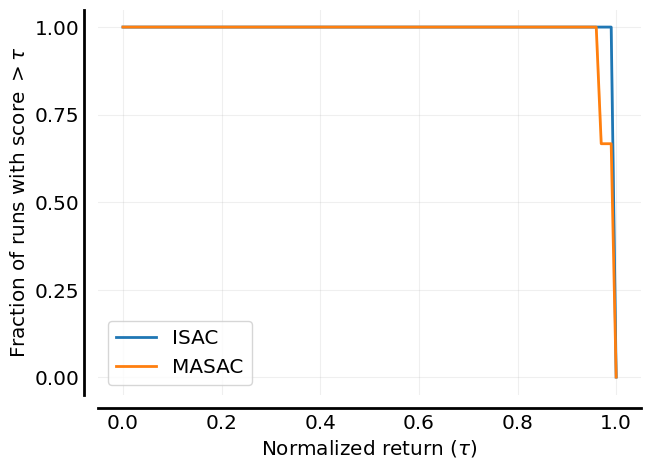

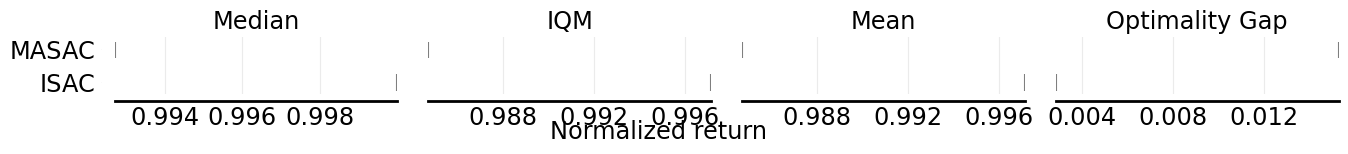

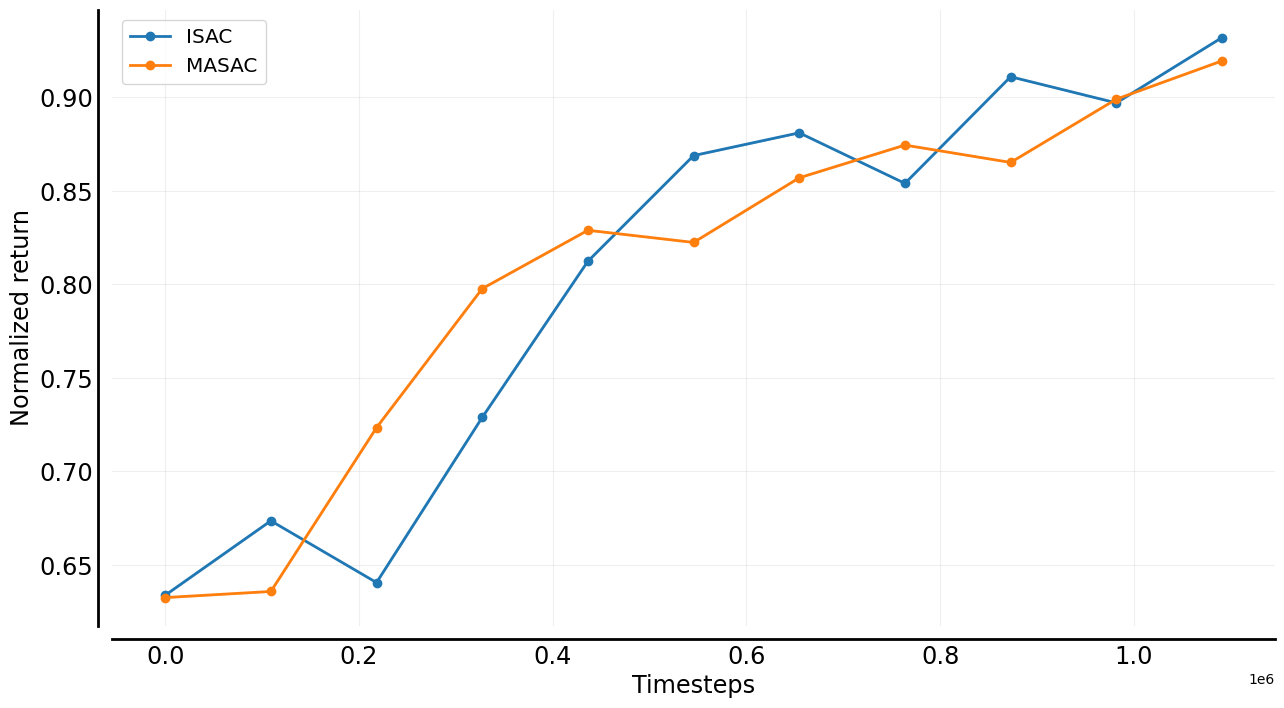

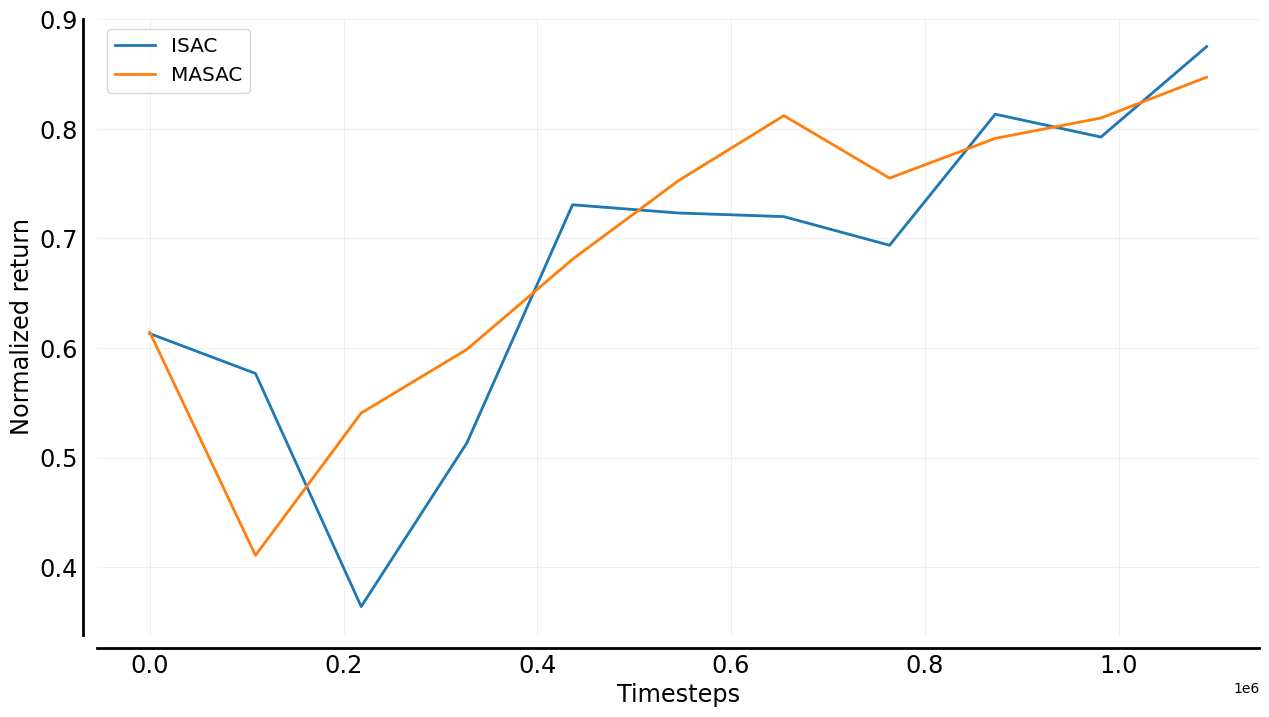

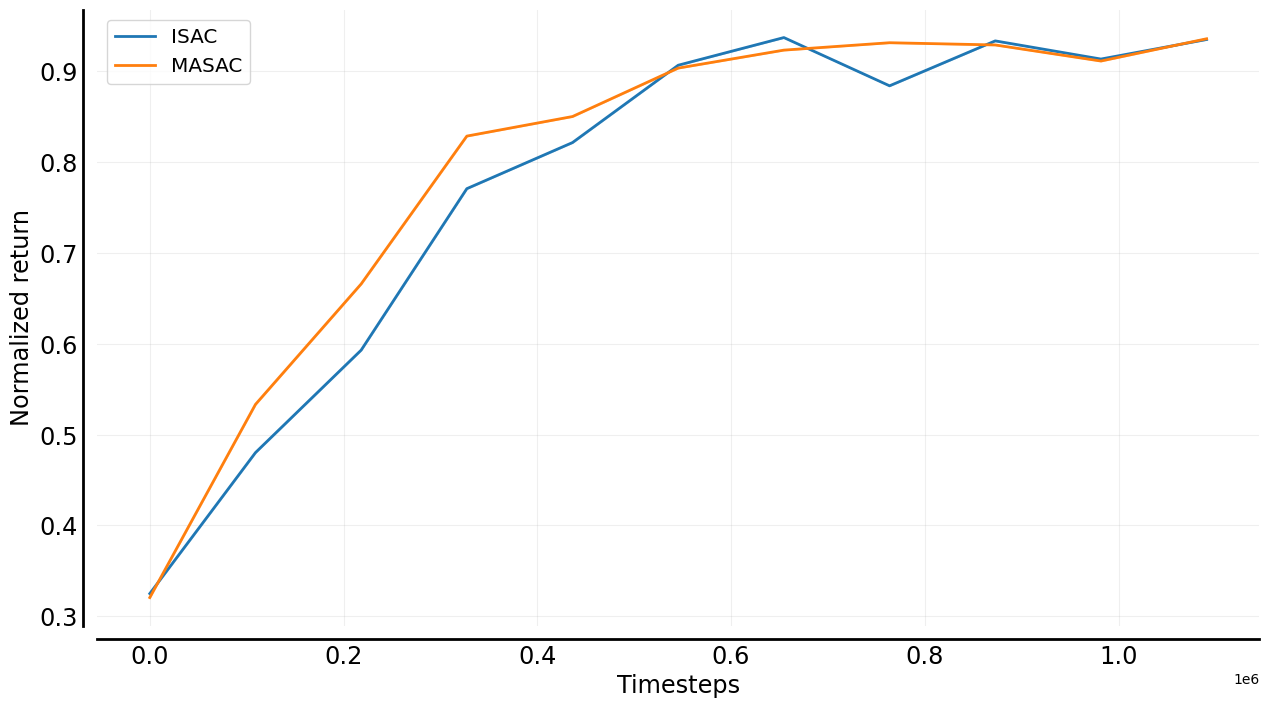

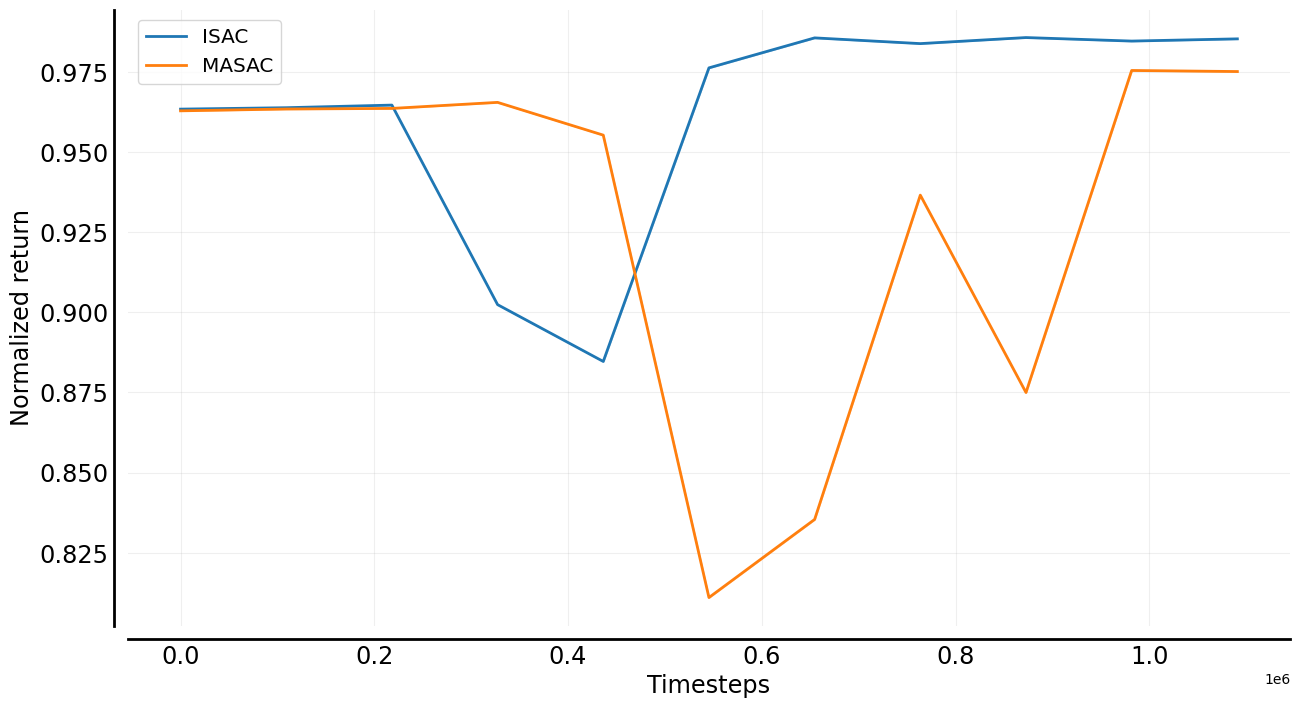

In [4]:
import os
from pathlib import Path
from typing import List

from benchmarl.eval_results import load_and_merge_json_dicts, Plotting
from matplotlib import pyplot as plt

def run_benchmark() -> List[str]:
    from benchmarl.algorithms import IsacConfig, MasacConfig
    from benchmarl.benchmark import Benchmark
    from benchmarl.environments import VmasTask
    from benchmarl.experiment import ExperimentConfig
    from benchmarl.models.mlp import MlpConfig

    # Configure experiment
    experiment_config = ExperimentConfig.get_from_yaml()
    experiment_config.save_folder = Path.cwd()
    experiment_config.loggers = []
    experiment_config.loggers = ["wandb"]
    experiment_config.max_n_iters = 200

    # Tasks: Cooperative and Competitive
    tasks = [
        VmasTask.NAVIGATION.get_from_yaml(),  # Cooperative task
        VmasTask.SIMPLE_SPREAD.get_from_yaml(),  # Cooperative task
        VmasTask.SIMPLE_ADVERSARY.get_from_yaml()      # Competitive task
    ]

    # Algorithm Configuration
    algorithm_configs = [
        IsacConfig.get_from_yaml(),
        MasacConfig.get_from_yaml()
    ]

    model_config = MlpConfig.get_from_yaml()
    critic_model_config = MlpConfig.get_from_yaml()


    benchmark = Benchmark(
        algorithm_configs=algorithm_configs,
        tasks=tasks,
        seeds={0},
        experiment_config=experiment_config,
        model_config=model_config,
        critic_model_config=critic_model_config,
    )

    # Run experiments
    experiments = benchmark.get_experiments()
    experiments_json_files = []
    for experiment in experiments:
        exp_json_file = str(
            Path(experiment.folder_name) / Path(experiment.name + ".json")
        )
        experiments_json_files.append(exp_json_file)
        experiment.run()
    return experiments_json_files

if __name__ == "__main__":
    # Run benchmark and get JSON files
    experiments_json_files = run_benchmark()

    # Load and process experiment outputs
    raw_dict = load_and_merge_json_dicts(experiments_json_files)
    processed_data = Plotting.process_data(raw_dict)
    (
        environment_comparison_matrix,
        sample_efficiency_matrix,
    ) = Plotting.create_matrices(processed_data, env_name="vmas")

    # Plotting
    Plotting.performance_profile_figure(
        environment_comparison_matrix=environment_comparison_matrix
    )
    plt.savefig("performance.png")
    Plotting.aggregate_scores(
        environment_comparison_matrix=environment_comparison_matrix
    )
    plt.savefig("aggregate_scores.png")
    Plotting.environemnt_sample_efficiency_curves(
        sample_effeciency_matrix=sample_efficiency_matrix
    )
    plt.savefig("sample_efficiency.png")
    Plotting.task_sample_efficiency_curves(
        processed_data=processed_data, env="vmas", task="simple_spread"
    )
    plt.savefig("task_sample_efficiency_spread.png")
    Plotting.task_sample_efficiency_curves(
        processed_data=processed_data, env="vmas", task="simple_adversary"
    )

    plt.savefig("task_navigation.png")
    Plotting.task_sample_efficiency_curves(
        processed_data=processed_data, env="vmas", task="navigation"
    )
    plt.savefig("task_sample_efficiency_adversary.png")
    plt.show()

In [ ]:
import os

# Specify the directory to search
directory_path = "./"  # Change this to your target directory

json_files = []
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.endswith(".json"):
            json_files.append(os.path.join(root, file))
json_files

In [ ]:
#  Copyright (c) Meta Platforms, Inc. and affiliates.
#
#  This source code is licensed under the license found in the
#  LICENSE file in the root directory of this source tree.
#

import os
from pathlib import Path
from typing import List

from benchmarl.eval_results import load_and_merge_json_dicts, Plotting

from matplotlib import pyplot as plt


def run_benchmark() -> List[str]:
    from benchmarl.algorithms import MappoConfig, QmixConfig
    from benchmarl.benchmark import Benchmark
    from benchmarl.environments import VmasTask
    from benchmarl.experiment import ExperimentConfig
    from benchmarl.models.mlp import MlpConfig
    from benchmarl.algorithms import IsacConfig, MasacConfig
    from benchmarl.benchmark import Benchmark
    from benchmarl.environments import MeltingPotTask
    from benchmarl.models.cnn import CnnConfig


    # Loads from "benchmarl/conf/task/meltingpot"
    tasks = [MeltingPotTask.COLLABORATIVE_COOKING__CIRCUIT.get_from_yaml(),
            #MeltingPotTask.CHICKEN_IN_THE_MATRIX__ARENA.get_from_yaml(),
            #MeltingPotTask.CLEAN_UP.get_from_yaml()
            ]

    # Loads from "benchmarl/conf/algorithm"
    algorithm_configs = [
        IsacConfig.get_from_yaml(),
        MasacConfig.get_from_yaml(),
    ]

    # Loads from "benchmarl/conf/model/layers"
    model_config = CnnConfig.get_from_yaml()
    critic_model_config = CnnConfig.get_from_yaml()

    experiment_config = ExperimentConfig.get_from_yaml()
    experiment_config.max_n_iters = 20
    experiment_config.loggers = ["wandb"]
    experiment_config.train_device = "cuda"
    experiment_config.sampling_device = "cpu"
    experiment_config.project_name = "BenchMARL-ISACvsMASAC"
    experiment_config.save_folder = Path.cwd()

    benchmark = Benchmark(
        algorithm_configs=algorithm_configs,
        tasks=tasks,
        seeds={0},
        experiment_config=experiment_config,
        model_config=model_config,
        critic_model_config=critic_model_config,
    )

    # For each experiment, run it and get its output file name
    experiments = benchmark.get_experiments()
    experiments_json_files = []
    for experiment in experiments:
        exp_json_file = str(
            Path(experiment.folder_name) / Path(experiment.name + ".json")
        )
        experiments_json_files.append(exp_json_file)
        experiment.run()
    return experiments_json_files


if __name__ == "__main__":
    # Uncomment this to rerun the benchmark that generates the files
    experiments_json_files = run_benchmark()
    #experiments_json_files = json_files
    raw_dict = load_and_merge_json_dicts(experiments_json_files)

    # Load and process experiment outputs
    # raw_dict = load_and_merge_json_dicts(experiments_json_files)
    processed_data = Plotting.process_data(raw_dict)
    (
        environment_comparison_matrix,
        sample_efficiency_matrix,
    ) = Plotting.create_matrices(processed_data, env_name="meltingpot")

    # Plotting
    Plotting.performance_profile_figure(
        environment_comparison_matrix=environment_comparison_matrix
    )
    plt.savefig("performance.png")
    Plotting.aggregate_scores(
        environment_comparison_matrix=environment_comparison_matrix
    )
    plt.savefig("aggregare_scores.png")
    Plotting.environemnt_sample_efficiency_curves(
        sample_effeciency_matrix=sample_efficiency_matrix
    )
    plt.savefig("sample_efficiency.png")
    Plotting.task_sample_efficiency_curves(
        processed_data=processed_data, env="meltingpot", task="collaborative_cooking__circuit"
    )
    plt.savefig("task_sample_efficiency.png")
    Plotting.probability_of_improvement(
        environment_comparison_matrix,
        algorithms_to_compare=[["isac", "masac"]],
    )
    plt.savefig("probability_of_improvement.png")
    plt.show()

In [ ]:
from benchmarl.algorithms import MappoConfig
from benchmarl.environments import VmasTask
from benchmarl.experiment import Experiment, ExperimentConfig
from benchmarl.models.mlp import MlpConfig

# Loads from "benchmarl/conf/experiment/base_experiment.yaml"
experiment_config = ExperimentConfig.get_from_yaml()
# Loads from "benchmarl/conf/task/vmas/balance.yaml"
task = VmasTask.BALANCE.get_from_yaml()
# Loads from "benchmarl/conf/algorithm/mappo.yaml"
algorithm_config = MappoConfig.get_from_yaml()
# Loads from "benchmarl/conf/model/layers/mlp.yaml"
model_config = MlpConfig.get_from_yaml()
critic_model_config = MlpConfig.get_from_yaml()

experiment_config.max_n_iters = 2
experiment_config.loggers = []

experiment = Experiment(
    task=task,
    algorithm_config=algorithm_config,
    model_config=model_config,
    critic_model_config=critic_model_config,
    seed=0,
    config=experiment_config,
)
experiment.run()